In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
teams = pd.read_csv('../../../data/MDataFiles_Stage1/MTeams.csv')
seasons = pd.read_csv('../../../data/MDataFiles_Stage1/MSeasons.csv')
seeds = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
coaches=pd.read_csv('../../../data/MDataFiles_Stage1/MTeamCoaches.csv')


In [51]:
regular_results = pd.read_csv('../../../data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
bracket_res = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')

In [52]:
regular_detail = pd.read_csv('../../../data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
bracket_detail = pd.read_csv('../../../data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')

In [53]:
cities=pd.read_csv('../../../data/MDataFiles_Stage1/Cities.csv')
cities_games = pd.read_csv('../../../data/MDataFiles_Stage1/MGameCities.csv')

In [54]:
ranks=pd.read_csv('../../../data/MDataFiles_Stage1/MMasseyOrdinals.csv')


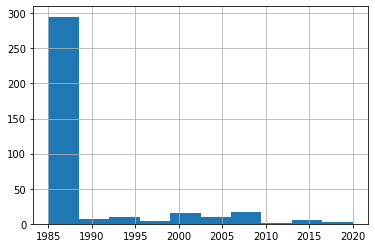

In [55]:
teams['FirstD1Season'].hist()

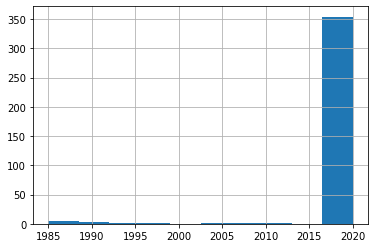

In [56]:
teams['LastD1Season'].hist()

In [57]:
regular_results.sample(4)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
27927,1992,28,1130,123,1306,78,H,0
20865,1990,68,1175,80,1126,67,H,0
139248,2015,115,1454,61,1460,58,A,0
63129,2000,86,1246,75,1208,69,A,0


In [59]:
nb_Adverse=regular_detail[regular_detail['WLoc']=='A'].shape[0]
nb_Home=regular_detail[regular_detail['WLoc']=='H'].shape[0]
nb_Neutral=regular_detail[regular_detail['WLoc']=='N'].shape[0]
print("Pourcentage de matchs gagnés à la maison si le match se joue à domicile ou sur le terrain adverse")
print(nb_Home/(nb_Home+nb_Adverse))

print("Pourcentage de matchs perdus à la maison si le match se joue à domicile ou sur le terrain adverse")
print(nb_Adverse/(nb_Home+nb_Adverse))

Pourcentage de matchs gagnés à la maison si le match se joue à domicile ou sur le terrain adverse
0.6594853914282806
Pourcentage de matchs perdus à la maison si le match se joue à domicile ou sur le terrain adverse
0.34051460857171945


In [102]:
Victories_per_Team= regular_results.groupby('WTeamID').agg('count')


In [103]:
Victories_per_Team['Nombre_victoires']=Victories_per_Team['Season']
Victories_per_Team.drop(['Season', 'DayNum', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], axis=1, inplace=True)


In [104]:
Victories_per_Team['Nombre_matchs']=Victories_per_Team['Nombre_victoires']+regular_results.groupby('LTeamID').agg('count')['Season']
Victories_per_Team['Pourcentage_Victoire']=Victories_per_Team['Nombre_victoires']/Victories_per_Team['Nombre_matchs']

In [105]:
# Feature qualité de la défense (buts encaissés, ?)
Victories_per_Team['Buts_moyens_encaissés']=regular_detail.groupby('WTeamID').sum()['LScore']
Victories_per_Team.dropna()
Victories_per_Team['Buts_moyens_encaissés']+=regular_detail.groupby('LTeamID').sum()['WScore']
Victories_per_Team['Buts_moyens_encaissés']=Victories_per_Team['Buts_moyens_encaissés']/Victories_per_Team['Nombre_matchs']

# Feature 
Victories_per_Team['Buts_moyens_marqués']=regular_detail.groupby('WTeamID').sum()['WScore']
Victories_per_Team['Buts_moyens_marqués']+=regular_detail.groupby('LTeamID').sum()['LScore']
Victories_per_Team['Buts_moyens_marqués']=Victories_per_Team['Buts_moyens_marqués']/Victories_per_Team['Nombre_matchs']
Victories_per_Team['Moyenne_diff_score']=Victories_per_Team['Buts_moyens_marqués']-Victories_per_Team['Buts_moyens_encaissés']

In [106]:
# Feature mental (% de matchs gagnés sur terrain adverse)
Victories_per_Team['Victoires_sur_terrain_adverse']=regular_detail[regular_detail['WLoc']=='A'].groupby(['WTeamID']).count()['Season']
Victories_per_Team['Défaites_sur_terrain_adverse']=regular_detail[regular_detail['WLoc']=='H'].groupby(['LTeamID']).count()['Season']
Victories_per_Team['Pourcentage_V_terrain_adverse']=Victories_per_Team['Victoires_sur_terrain_adverse']/(Victories_per_Team['Victoires_sur_terrain_adverse']+Victories_per_Team['Défaites_sur_terrain_adverse'])


In [107]:
Victories_per_Team.sample(2)

,Nombre_victoires,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Victoires_sur_terrain_adverse,Défaites_sur_terrain_adverse,Pourcentage_V_terrain_adverse
WTeamID,,,,,,,,,
1166,640,1052,0.608365,34.477186,38.225285,3.748099,95.0,106.0,0.472637
1352,502,1022,0.491194,35.795499,36.109589,0.314090,129.0,160.0,0.446367


In [108]:
# Est-ce que leurs erreurs sont récurrentes et ont une influence ?
Victories_per_Team['Fools']=regular_detail.groupby('WTeamID').sum()['WPF']
Victories_per_Team['Fools']=Victories_per_Team['Fools']+regular_detail.groupby('LTeamID').sum()['LPF']
Victories_per_Team['Fools']=Victories_per_Team['Fools']/Victories_per_Team['Nombre_matchs']

In [109]:
Victories_per_Team['Blocks']=regular_detail.groupby('WTeamID').sum()['WBlk']
Victories_per_Team['Blocks']=Victories_per_Team['Blocks']+regular_detail.groupby('LTeamID').sum()['LBlk']
Victories_per_Team['Blocks']=Victories_per_Team['Blocks']/Victories_per_Team['Nombre_matchs']

In [110]:
Victories_per_Team['Steals']=regular_detail.groupby('WTeamID').sum()['WStl']
Victories_per_Team['Steals']=Victories_per_Team['Steals']+regular_detail.groupby('LTeamID').sum()['LStl']
Victories_per_Team['Steals']=Victories_per_Team['Steals']/Victories_per_Team['Nombre_matchs']

In [111]:
Victories_per_Team.sample(2)

,Nombre_victoires,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Victoires_sur_terrain_adverse,Défaites_sur_terrain_adverse,Pourcentage_V_terrain_adverse,Fools,Blocks,Steals
WTeamID,,,,,,,,,,,,
1108,324,950,0.341053,38.430526,33.320000,-5.110526,46.0,236.0,0.163121,10.511579,1.583158,3.435789
1132,482,988,0.487854,35.539474,34.512146,-1.027328,77.0,164.0,0.319502,9.892713,1.755061,3.450405


In [112]:
# Arrivée plus récente en D1 ? 
Victories_per_Team=Victories_per_Team.merge(teams, left_on='WTeamID', right_on='TeamID')

In [113]:
Victories_per_Team['Ancienneté']=Victories_per_Team['LastD1Season']-Victories_per_Team['FirstD1Season']
Victories_per_Team.sample(5)

,Nombre_victoires,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Victoires_sur_terrain_adverse,Défaites_sur_terrain_adverse,Pourcentage_V_terrain_adverse,Fools,Blocks,Steals,TeamID,TeamName,FirstD1Season,LastD1Season,Ancienneté
340,342,945,0.361905,38.664550,36.068783,-2.595767,62.0,198.0,0.238462,10.960847,1.495238,3.923810,1441,W Carolina,1985,2020,35
244,706,1064,0.663534,32.707707,36.113722,3.406015,75.0,103.0,0.421348,9.205827,2.035714,3.111842,1345,Purdue,1985,2020,35
10,439,964,0.455394,37.488589,36.407676,-1.080913,74.0,174.0,0.298387,9.739627,1.757261,3.266598,1111,Appalachian St,1985,2020,35
32,523,1046,0.500000,34.538241,33.686424,-0.851816,54.0,161.0,0.251163,9.796367,1.540153,3.528681,1133,Bradley,1985,2020,35
57,563,816,0.689951,43.911765,45.949755,2.037990,116.0,109.0,0.515556,11.162990,2.393382,4.132353,1158,Col Charleston,1992,2020,28


In [20]:
regular_detail.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [114]:
# We drop a few not useful columns for this exercise
Victories_per_Team.drop(['Nombre_victoires', 'Nombre_matchs','TeamID', 'TeamName', 'FirstD1Season','LastD1Season'],axis=1, inplace=True)

# Observons la corrélation du pourcentage de victoires avec les autres features
Victories_per_Team.corr(method='pearson')


,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Victoires_sur_terrain_adverse,Défaites_sur_terrain_adverse,Pourcentage_V_terrain_adverse,Fools,Blocks,Steals,Ancienneté
Pourcentage_Victoire,1.000000,-0.383479,-0.181712,0.903108,0.537670,-0.653553,0.807926,-0.365980,0.093168,-0.263590,0.416647
Buts_moyens_encaissés,-0.383479,1.000000,0.972516,-0.498817,-0.344221,-0.009310,-0.257169,0.980145,0.678489,0.926428,-0.937199
Buts_moyens_marqués,-0.181712,0.972516,1.000000,-0.283307,-0.216383,-0.172992,-0.060073,0.957103,0.740675,0.921244,-0.920468
Moyenne_diff_score,0.903108,-0.498817,-0.283307,1.000000,0.612353,-0.605599,0.835640,-0.474406,-0.037549,-0.386636,0.433888
Victoires_sur_terrain_adverse,0.537670,-0.344221,-0.216383,0.612353,1.000000,-0.172344,0.805046,-0.319601,-0.125505,-0.229397,0.379713
Défaites_sur_terrain_adverse,-0.653553,-0.009310,-0.172992,-0.605599,-0.172344,1.000000,-0.663374,-0.014316,-0.290702,-0.059313,0.192548
Pourcentage_V_terrain_adverse,0.807926,-0.257169,-0.060073,0.835640,0.805046,-0.663374,1.000000,-0.230292,0.090529,-0.149968,0.202738
Fools,-0.365980,0.980145,0.957103,-0.474406,-0.319601,-0.014316,-0.230292,1.000000,0.673013,0.932686,-0.931291
Blocks,0.093168,0.678489,0.740675,-0.037549,-0.125505,-0.290702,0.090529,0.673013,1.000000,0.742120,-0.648413
Steals,-0.263590,0.926428,0.921244,-0.386636,-0.229397,-0.059313,-0.149968,0.932686,0.742120,1.000000,-0.876398


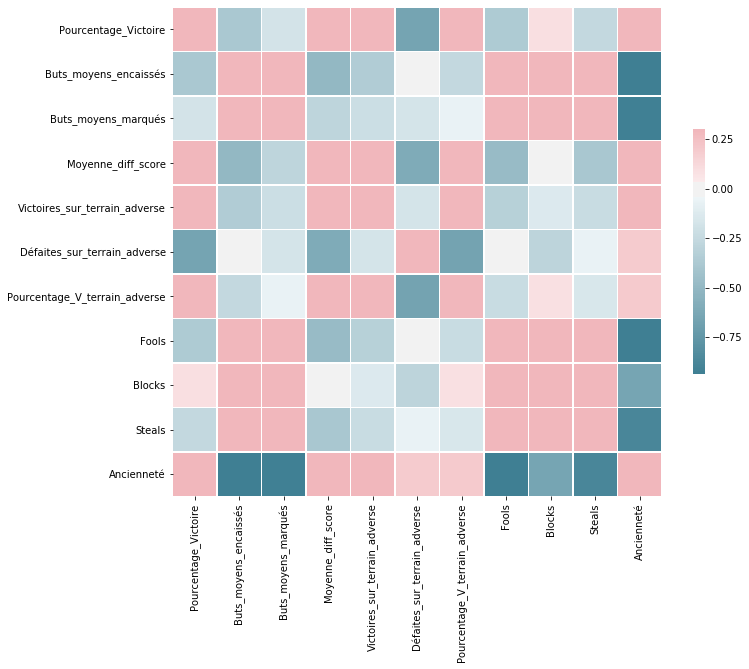

In [115]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = Victories_per_Team.corr(method='pearson')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Etude saison par saison

In [120]:
victories_per_year= regular_results.groupby(['WTeamID', 'Season']).agg('count')
victories_per_year['Nombre_victoires']=victories_per_year['DayNum']
victories_per_year.drop([ 'WScore', 'DayNum', 'LTeamID', 'LScore', 'WLoc', 'NumOT'], axis=1, inplace=True)

In [121]:
victories_per_year['Nombre_défaites']=regular_results.groupby(['LTeamID', 'Season']).agg('count')['DayNum']
victories_per_year['Nombre_matchs']=victories_per_year['Nombre_défaites']+victories_per_year['Nombre_victoires']
victories_per_year.dropna()
victories_per_year['Pourcentage_Victoire']=victories_per_year['Nombre_victoires']/victories_per_year['Nombre_matchs']

In [122]:
victories_per_year.sample(2)

,,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire
WTeamID,Season,,,,
1254,2014,9,20.0,29.0,0.310345
1172,2009,25,7.0,32.0,0.781250


In [124]:
# Feature qualité de la défense (buts encaissés, ?)
victories_per_year['Buts_moyens_encaissés_V']=regular_detail.groupby(['WTeamID', 'Season']).sum()['LScore']
victories_per_year.dropna()
victories_per_year['Buts_moyens_encaissés_D']=regular_detail.groupby(['LTeamID', 'Season']).sum()['WScore']
victories_per_year['Buts_moyens_encaissés']=victories_per_year['Buts_moyens_encaissés_D']+victories_per_year['Buts_moyens_encaissés_V']/victories_per_year['Nombre_matchs']

# Feature 
victories_per_year['Buts_moyens_marqués']=regular_detail.groupby(['WTeamID', 'Season']).sum()['WScore']
victories_per_year['Buts_moyens_marqués']+=regular_detail.groupby(['LTeamID', 'Season']).sum()['LScore']
victories_per_year['Buts_moyens_marqués']=victories_per_year['Buts_moyens_marqués']/victories_per_year['Nombre_matchs']
victories_per_year['Moyenne_diff_score']=victories_per_year['Buts_moyens_marqués']-victories_per_year['Buts_moyens_encaissés']

ValueError: operands could not be broadcast together with shapes (11227,2) (3,) (11227,2) 

In [47]:
victories_per_year['Buts_moyens_encaissés']=regular_detail.groupby(['WTeamID', 'Season']).mean()['LScore']
victories_per_year['Buts_moyens_marqués']=regular_detail.groupby(['WTeamID', 'Season']).mean()['WScore']
victories_per_year['Moyenne_diff_score']=victories_per_year['Buts_moyens_marqués']-victories_per_year['Buts_moyens_encaissés']

In [48]:
victories_per_year.sample(2)

,,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score
WTeamID,Season,,,,,,,
1387,2008,16,15.0,31.0,0.483871,55.375000,66.937500,11.562500
1153,2003,17,11.0,28.0,0.392857,58.352941,72.529412,14.176471


In [ ]:
victories_per_year[]